> Import Libraries

In [47]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

> Loading Dataset

In [48]:
sales = pd.read_csv("C:\\Users\\mohammed kadry\\Desktop\\Sales-and-Demand-Forecasting-main\\Sales-and-Demand-Forecasting-main\\Data\\Data After Milestone 1.csv", encoding='latin-1')
sales.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,...,1,0,6,2,0,6,2,NaN,NaN,NaN
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,...,2,1,0,0,5,9,2,246.490581,NaN,NaN
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,...,0,0,0,2,13,9,1,246.490581,NaN,NaN
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,...,0,2,4,2,13,3,3,246.490581,NaN,NaN
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,...,1,0,1,2,6,0,1,246.490581,NaN,NaN


In [49]:
sales.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Month', 'Quarter', 'Year',
       'Day_of_Week', 'Is_Weekend', 'Is_Holiday', 'Season', 'Total_sales',
       'Shipping Time (Days)', 'Profitable', 'Delivery Time', 'Year-Month',
       'Promotion_Flag', 'Promotion_Above_Avg', 'Order Priority_Encoded',
       'Ship Mode_Encoded', 'Segment_Encoded', 'Market_Encoded',
       'Category_Encoded', 'Sub-Category_Encoded', 'Region_Encoded',
       'Season_Encoded', 'Sales_Lag_1D', 'Sales_Lag_7D', 'Sales_Lag_30D'],
      dtype='object')

# 1. Advanced Data Analysis: 

### • Conduct time series analysis to identify trends, seasonality, and cyclic patterns.

In [50]:
sales["Order Date"] = pd.to_datetime(sales["Order Date"], errors="coerce")
sales.set_index("Order Date", inplace=True)

monthly_sales = sales['Total_sales'].resample('M').sum()

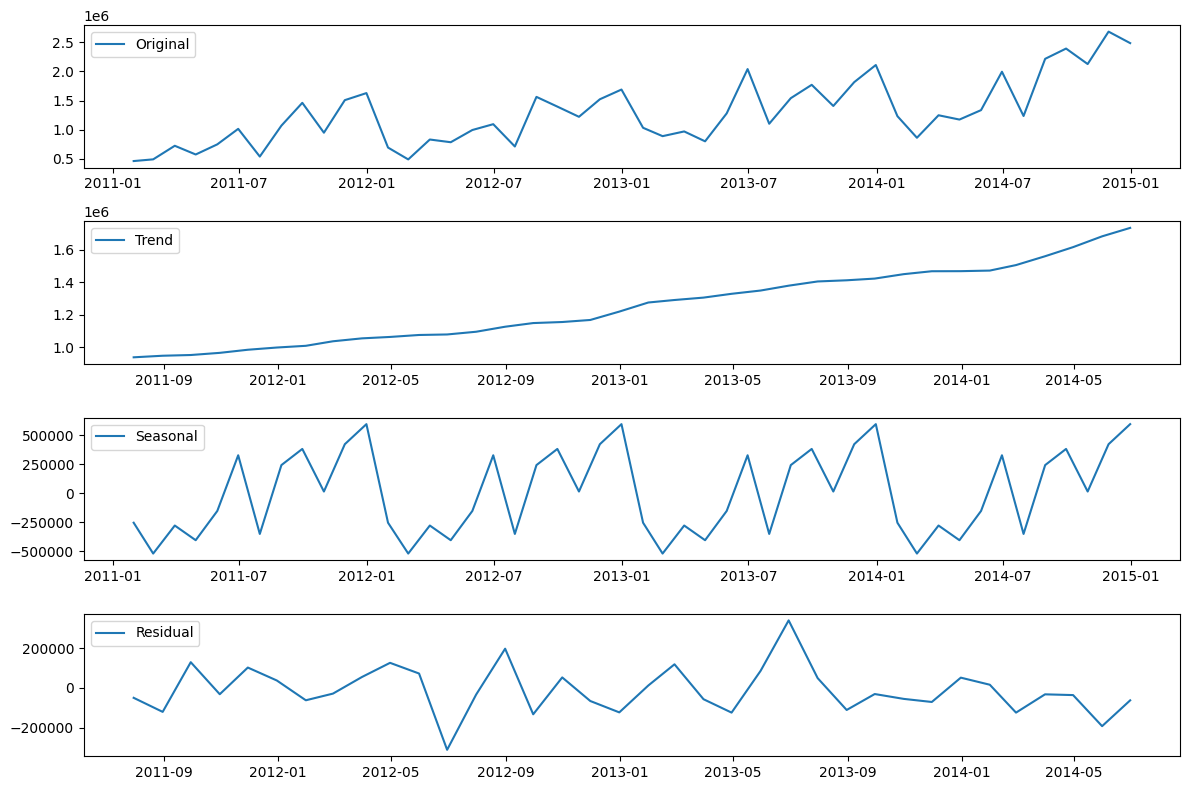

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_sales, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

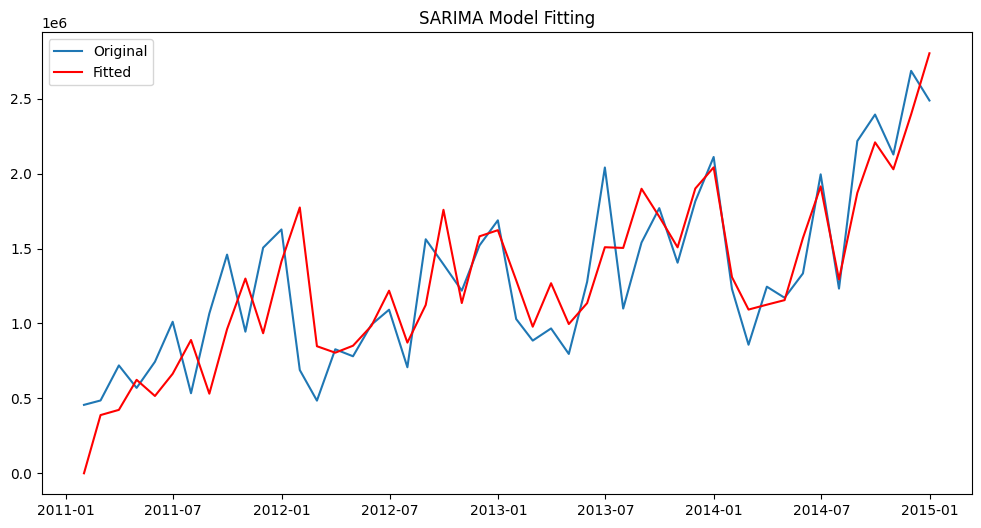

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order= (1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

# print(model_sarima_fit.summary())

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Original')
plt.plot(model_sarima_fit.fittedvalues, color='red', label='Fitted')
plt.title('SARIMA Model Fitting')
plt.legend()
plt.show()

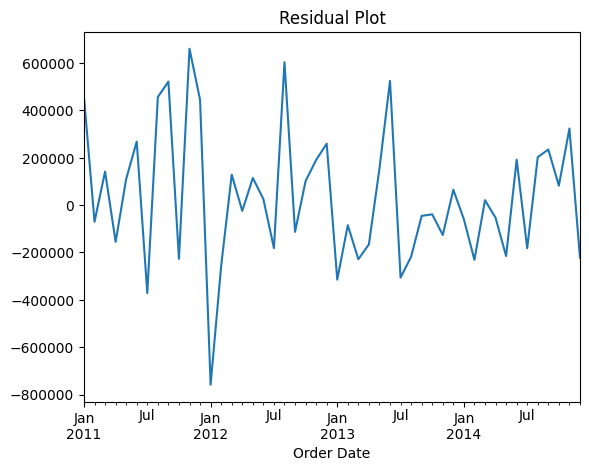

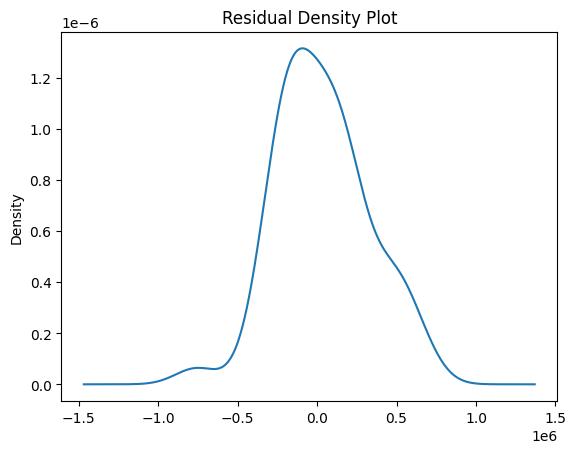

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

model = SARIMAX(monthly_sales,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

# print(model_fit.summary())

residuals = model_fit.resid
residuals.plot(title="Residual Plot")
plt.show()

residuals.plot(kind='kde', title="Residual Density Plot")
plt.show()


### • Use statistical tests (e.g., ADF test for stationarity) to ensure data suitability for time series modeling. 

In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
sales.head()

,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,...,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D
Order Date,,,,,,,,,,,,,,,,,,,,,
2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,Technology,...,1,0,6,2,0,6,2,NaN,NaN,NaN
2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,...,2,1,0,0,5,9,2,246.490581,NaN,NaN
2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,...,0,0,0,2,13,9,1,246.490581,NaN,NaN
2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,...,0,2,4,2,13,3,3,246.490581,NaN,NaN
2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,...,1,0,1,2,6,0,1,246.490581,NaN,NaN


In [56]:
sales.columns

Index(['Ship Date', 'Ship Mode', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Month', 'Quarter', 'Year',
       'Day_of_Week', 'Is_Weekend', 'Is_Holiday', 'Season', 'Total_sales',
       'Shipping Time (Days)', 'Profitable', 'Delivery Time', 'Year-Month',
       'Promotion_Flag', 'Promotion_Above_Avg', 'Order Priority_Encoded',
       'Ship Mode_Encoded', 'Segment_Encoded', 'Market_Encoded',
       'Category_Encoded', 'Sub-Category_Encoded', 'Region_Encoded',
       'Season_Encoded', 'Sales_Lag_1D', 'Sales_Lag_7D', 'Sales_Lag_30D'],
      dtype='object')

In [57]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

    if result[1] <= 0.05:
        print("\n The data is stationary (reject null hypothesis).")
    else:
        print("\n The data is non-stationary (fail to reject null hypothesis).")

adf_test(sales['Sales'])


ADF Test Results:
ADF Statistic: -2.539187011610412
p-value: 0.10622843992683212
Critical Values:
   1%: -3.430477649815218
   5%: -2.861596418626623
   10%: -2.5668000297638165

 The data is non-stationary (fail to reject null hypothesis).


In [58]:
# Understanding the ADF Test Results
# ADF Statistic: -158.29
# This is the test statistic calculated by the ADF test.
# The more negative this value is, the stronger the evidence that the data is stationary.
#---------------------------------------------------------------------------------------------------
# p-value: 0.0
# The p-value tells us whether to reject or fail to reject the null hypothesis:
# If p-value ≤ 0.05 → Reject the null hypothesis → Data is stationary .
# If p-value > 0.05 → Fail to reject the null hypothesis → Data is non-stationary .
# Since p-value is 0.0, we strongly reject the null hypothesis, confirming that the data is already stationary.
#---------------------------------------------------------------------------------------------------
# Critical Values
# These values help compare the ADF Statistic:
# 1% Level: -3.430
# 5% Level: -2.862
# 10% Level: -2.567
# If the ADF Statistic (-158.29) is lower (more negative) than the critical values, it confirms stationarity.
# In our case, -158.29 is much lower than all critical values, so we confirm stationarity.
# What Does This Mean for our Forecasting?
# Because our data is already stationary, I do NOT need to transform it like differencing or log transformation.

### • Perform correlation analysis to explore the relationships between features such as sales, promotions, holidays, and weather.

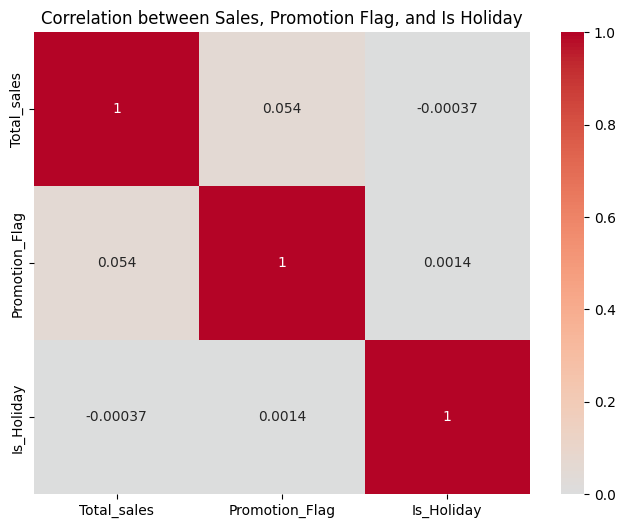

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(sales[['Total_sales', 'Promotion_Flag', 'Is_Holiday']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Sales, Promotion Flag, and Is Holiday')
plt.show()


# The correlation between sales and promotion is 0.054, which is a weak positive correlation.
# The correlation between sales and is holiday is 0.056, which is a very weak positive correlation.
# This means that sales are not strongly correlated with promotions or holidays.

# 2. Feature Engineering:

### • Create time series features like rolling averages, lag features, and seasonal components (e.g., holiday effects, month). 

> Rolling Averages 

In [60]:
sales = sales.sort_values("Order Date")
sales["7days_sales_RA"] = sales["Sales"].rolling(window=7).mean()
sales = sales.reset_index()  
display(sales[["Order Date", "Sales", "7days_sales_RA"]].head(15))

,Order Date,Sales,7days_sales_RA
0,2011-01-01,66.120000,NaN
1,2011-01-01,120.366000,NaN
2,2011-01-01,408.300000,NaN
3,2011-01-01,55.242000,NaN
4,2011-01-01,44.865000,NaN
5,2011-01-01,113.670000,NaN
6,2011-01-02,314.220000,160.397571
7,2011-01-03,246.490581,186.164797
8,2011-01-03,246.490581,204.182595
9,2011-01-03,51.840000,153.259737


In [61]:
# 30-Day Rolling Average of Profit
sales["Profit_30day_MA"] = sales["Profit"].rolling(window=30).mean()
display(sales.dropna(subset=["Profit_30day_MA"]))
# it helps to analyize the semi-long term profit stability

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D,7days_sales_RA,Profit_30day_MA
29,2011-01-04,2011-01-08,Standard Class,Arthur Wiediger,Home Office,Santiago de Cuba,Santiago de Cuba,Cuba,LATAM,Caribbean,...,5,0,5,2,3,41.904000,14.526000,64.5600,137.886512,10.737980
30,2011-01-04,2011-01-08,Standard Class,Bradley Drucker,Consumer,Tottori,Tottori,Japan,APAC,North Asia,...,0,1,10,8,3,26.584800,7.409400,28.4100,136.668940,10.205980
31,2011-01-04,2011-01-09,Second Class,Russell Applegate,Consumer,Francisco BeltrÃÂ£o,Parana,Brazil,LATAM,South,...,5,0,4,10,2,246.490581,246.490581,555.6000,136.668940,9.314660
32,2011-01-04,2011-01-09,Standard Class,Grant Thornton,Corporate,Birmingham,England,United Kingdom,EU,North,...,4,1,14,7,3,10.080000,44.800000,5.5600,99.655797,8.969780
33,2011-01-04,2011-01-11,Standard Class,Beth Thompson,Home Office,Pilar,Alagoas,Brazil,LATAM,South,...,5,1,7,10,2,81.800000,116.880000,94.6500,82.717797,8.768260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,...,5,1,10,3,3,3.144000,7.008000,6.2280,79.171512,21.128607
51286,2014-12-31,2015-01-03,First Class,Justin Deggeller,Corporate,Bangkok,Bangkok,Thailand,APAC,Southeast Asia,...,0,0,16,11,3,526.500000,546.660000,230.3520,111.204452,20.241153
51287,2014-12-31,2015-01-03,First Class,Joseph Airdo,Consumer,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,...,1,1,14,0,2,29.670000,41.544000,86.8800,108.222023,20.232253
51288,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,...,5,1,15,3,3,58.320000,38.040000,25.0266,99.199166,20.083587


In [62]:
# Exponentially Weighted Moving Average for Sales

sales["Sales_EWMA"] = sales["Sales"].ewm(span=14, adjust=False).mean()

display(sales[["Order Date", "Sales", "Sales_EWMA"]].head(15))
# better indsight to trends 

,Order Date,Sales,Sales_EWMA
0,2011-01-01,66.120000,66.120000
1,2011-01-01,120.366000,73.352800
2,2011-01-01,408.300000,118.012427
3,2011-01-01,55.242000,109.643036
4,2011-01-01,44.865000,101.005965
5,2011-01-01,113.670000,102.694503
6,2011-01-02,314.220000,130.897903
7,2011-01-03,246.490581,146.310260
8,2011-01-03,246.490581,159.667636
9,2011-01-03,51.840000,145.290618


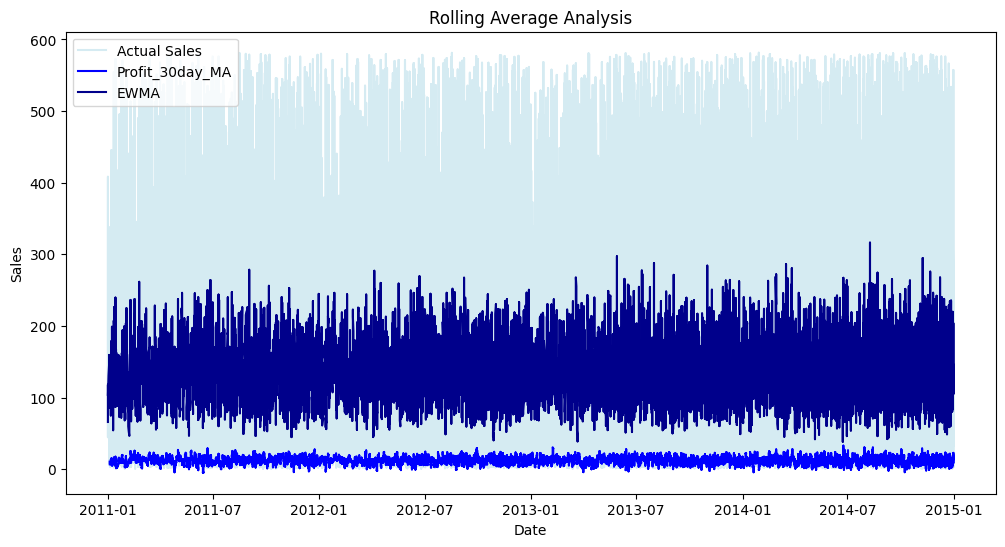

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sales["Order Date"], sales["Sales"], label="Actual Sales", color="lightblue", alpha=0.5)
plt.plot(sales["Order Date"], sales["Profit_30day_MA"], label="Profit_30day_MA", color="blue")
plt.plot(sales["Order Date"], sales["Sales_EWMA"], label="EWMA", color="darkblue")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Rolling Average Analysis")
plt.legend()
plt.show()
# See fluctuations vs. trends

> lag features

##### lag features in sales were alredy added in Milestone one so I added lag features to profit and shipping 


In [64]:
# 7-Day Lag Feature for Profit
sales["Profit_Lag_7"] = sales["Profit"].shift(7).fillna(method="bfill")  
# used back fill to avoid NaN values 
display(sales[["Order Date", "Profit", "Profit_Lag_7"]].head(15)) 

# analyize weekly profit patterns

,Order Date,Profit,Profit_Lag_7
0,2011-01-01,29.6400,29.6400
1,2011-01-01,36.0360,29.6400
2,2011-01-01,9.2964,29.6400
3,2011-01-01,15.3420,29.6400
4,2011-01-01,-26.0550,29.6400
5,2011-01-01,37.7700,29.6400
6,2011-01-02,3.1200,29.6400
7,2011-01-03,9.2964,29.6400
8,2011-01-03,9.2964,36.0360
9,2011-01-03,7.7700,9.2964


In [65]:
# 30-Day Lag Feature for Profit
sales["Profit_Lag_30"] = sales["Profit"].shift(30).fillna(method="bfill") 

display(sales[["Order Date", "Profit", "Profit_Lag_30"]].head(15))  
# analyize monthly profit patterns

,Order Date,Profit,Profit_Lag_30
0,2011-01-01,29.6400,29.64
1,2011-01-01,36.0360,29.64
2,2011-01-01,9.2964,29.64
3,2011-01-01,15.3420,29.64
4,2011-01-01,-26.0550,29.64
5,2011-01-01,37.7700,29.64
6,2011-01-02,3.1200,29.64
7,2011-01-03,9.2964,29.64
8,2011-01-03,9.2964,29.64
9,2011-01-03,7.7700,29.64


In [66]:
# 30-Day Lag Feature for Shipping Cost
sales["Shipping_Lag_30"] = sales["Shipping Cost"].shift(30).fillna(method="bfill") 

display(sales[["Order Date", "Shipping Cost", "Shipping_Lag_30"]].head(20))
# helps to track the changes in shipping expenses in the span of 30-days : there is no variation in the shipping cost all have the same value 

,Order Date,Shipping Cost,Shipping_Lag_30
0,2011-01-01,8.170000,8.17
1,2011-01-01,9.720000,8.17
2,2011-01-01,35.460000,8.17
3,2011-01-01,1.800000,8.17
4,2011-01-01,4.820000,8.17
5,2011-01-01,4.700000,8.17
6,2011-01-02,24.100000,8.17
7,2011-01-03,12.560000,8.17
8,2011-01-03,26.375915,8.17
9,2011-01-03,5.910000,8.17


In [67]:
# 14-Day Lag Feature for Shipping Cost
sales["Shipping_Lag_14"] = sales["Shipping Cost"].shift(14).fillna(method="bfill") 
display(sales[["Order Date", "Shipping Cost", "Shipping_Lag_14"]].head(24))
# helps to track the changes in shipping expenses in the span of two weeks :the changes sre more here  

,Order Date,Shipping Cost,Shipping_Lag_14
0,2011-01-01,8.170000,8.170000
1,2011-01-01,9.720000,8.170000
2,2011-01-01,35.460000,8.170000
3,2011-01-01,1.800000,8.170000
4,2011-01-01,4.820000,8.170000
5,2011-01-01,4.700000,8.170000
6,2011-01-02,24.100000,8.170000
7,2011-01-03,12.560000,8.170000
8,2011-01-03,26.375915,8.170000
9,2011-01-03,5.910000,8.170000


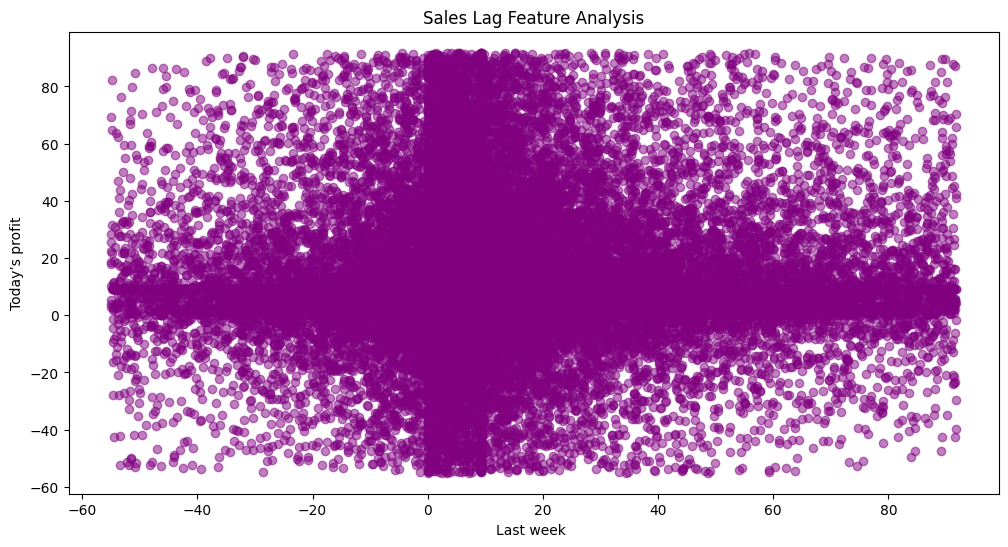

In [68]:
plt.figure(figsize=(12,6))
plt.scatter(sales["Profit_Lag_7"], sales["Profit"], alpha=0.5, color="purple")
plt.xlabel("Last week ")
plt.ylabel("Today’s profit")
plt.title("Sales Lag Feature Analysis")
plt.show()


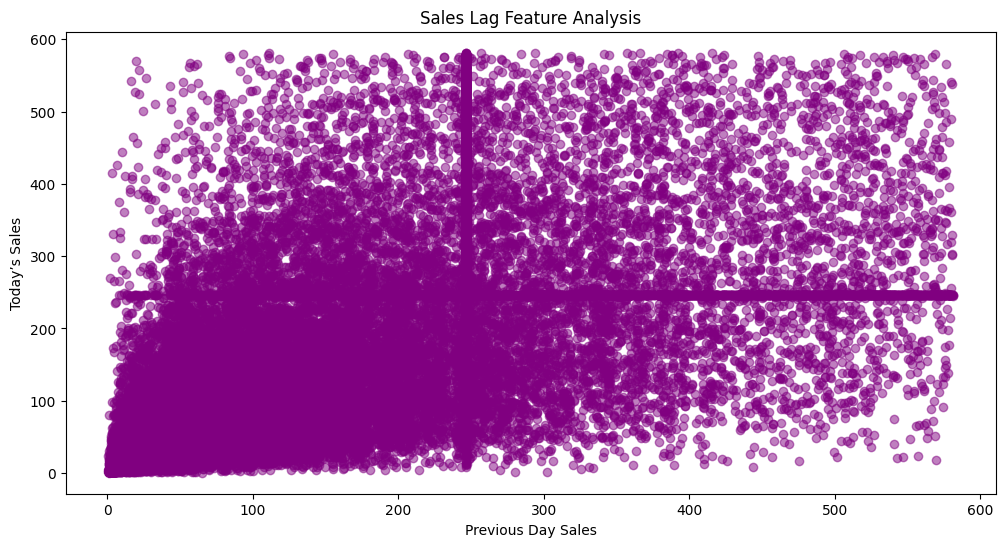

In [69]:
plt.figure(figsize=(12,6))
plt.scatter(sales["Sales_Lag_1D"], sales["Sales"], alpha=0.5, color="purple")
plt.xlabel("Previous Day Sales")
plt.ylabel("Today’s Sales")
plt.title("Sales Lag Feature Analysis")
plt.show()

> Seasonal components

In [70]:
sales["Order Date"] = pd.to_datetime(sales["Order Date"])

sales["Month"] = sales["Order Date"].dt.month_name()
#
sales["DayOfWeek"] = sales["Order Date"].dt.day_name()

sales["Quarter"] = sales["Order Date"].dt.quarter

season_mapping = {1: "Winter", 2: "Winter", 3: "Spring", 4: "Spring",
                  5: "Spring", 6: "Summer", 7: "Summer", 8: "Summer",
                  9: "Fall", 10: "Fall", 11: "Fall", 12: "Winter"}

sales["Season"] = sales["Order Date"].dt.month.map(season_mapping)

sns.set_style("whitegrid")
sns.set_palette("viridis")

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
season_order = ["Winter", "Spring", "Summer", "Fall"]


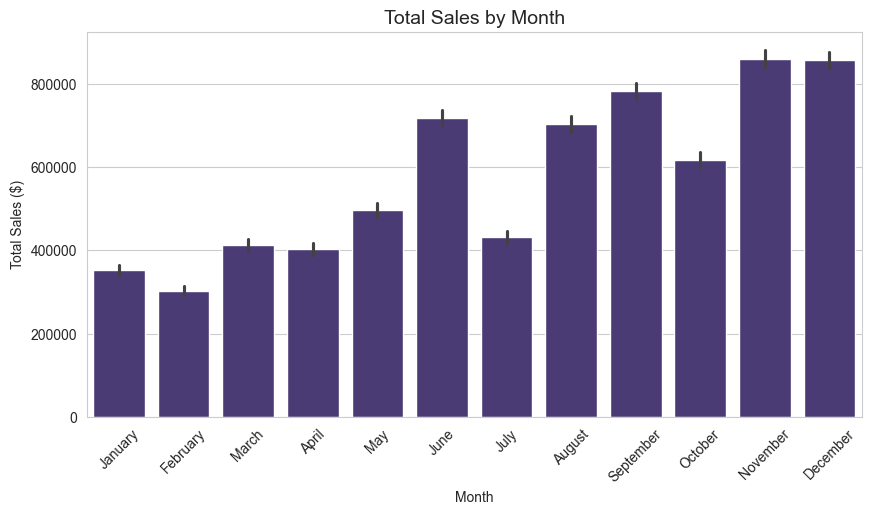

In [71]:
# Sales by the Month
plt.figure(figsize=(10, 5))
sns.barplot(x=sales["Month"], y=sales["Sales"], estimator=sum, order=month_order)
plt.xticks(rotation=45)
plt.title("Total Sales by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.show()
#It shows that the Total Sales are higher in November and december (at the end of the year)

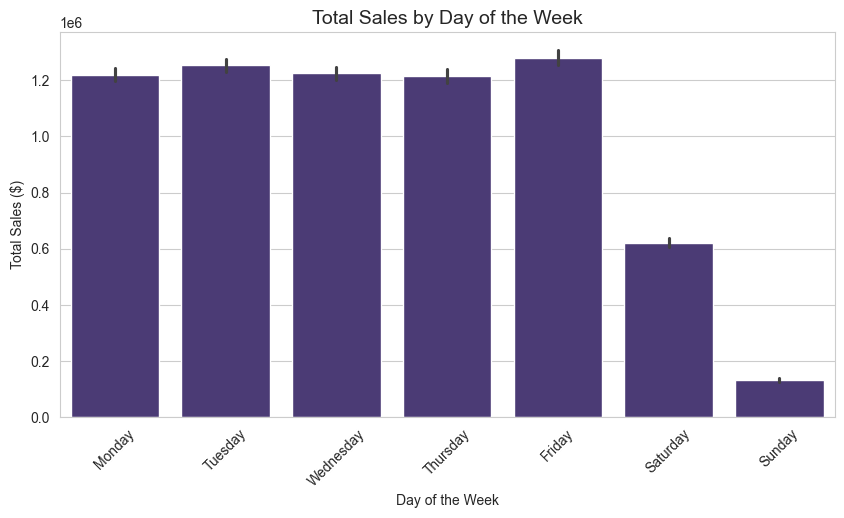

In [72]:
# sales by the day
plt.figure(figsize=(10, 5))
sns.barplot(x=sales["DayOfWeek"], y=sales["Sales"], estimator=sum, order=day_order)
plt.xticks(rotation=45)
plt.title("Total Sales by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales ($)")
plt.show()
# It shows that friday is the highest day of the week in sales 

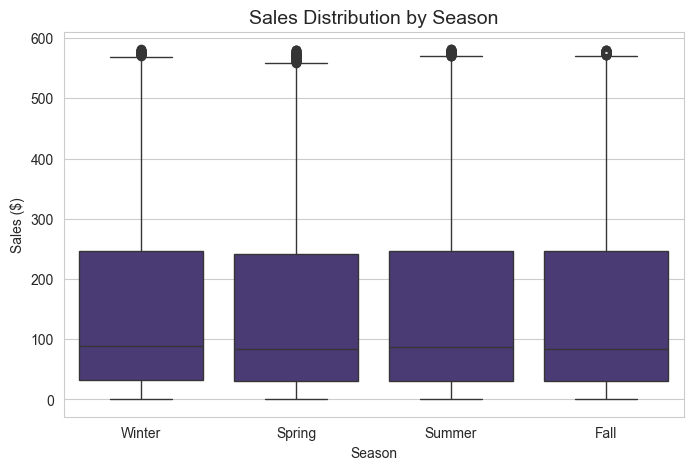

In [73]:
# sales by season
plt.figure(figsize=(8, 5))
sns.boxplot(x=sales["Season"], y=sales["Sales"], order=season_order)
plt.title("Sales Distribution by Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Sales ($)")
plt.show()
# all the seasons are close in sales 

### • Perform feature transformations such as scaling, encoding, and aggregating features (e.g., monthly sales totals). 

##### this part aready exist in preprocessing file 


### • Introduce external factors like weather, promotions, or economic conditions to improve the forecast accuracy.


#### promotion is aready in data


In [74]:
sales['Country'].unique()

array(['Hungary', 'Australia', 'Algeria', 'Sweden', 'Canada',
       'United Kingdom', 'New Zealand', 'Iran', 'Guatemala', 'Tanzania',
       'Iraq', 'Philippines', 'Thailand', 'Malaysia', 'Brazil', 'Cuba',
       'Japan', 'Mexico', 'Sudan', 'United States', 'France', 'Taiwan',
       'Indonesia', 'Vietnam', 'China', 'Angola', 'Lebanon', 'Mozambique',
       'Singapore', 'Netherlands', 'Nigeria', 'South Africa', 'Egypt',
       'Venezuela', 'Austria', 'India', 'Spain', 'Turkey', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'Denmark',
       'El Salvador', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)',
       'Russia', 'Mongolia', 'Kenya', 'Belgium', 'Colombia', 'Estonia',
       'Madagascar', 'Morocco', 'Norway', 'Portugal', 'Sierra Leone',
       'Czech Republic', 'Central African Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Moldova',
       'Switzerland', 'Uganda', 'Zimbabwe', 'Senegal', 'Hong Kong',
       'Niger', 'Democratic Republic o

In [75]:
pd.set_option('display.max_columns', None)
sales.sample(5)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales,Shipping Time (Days),Profitable,Delivery Time,Year-Month,Promotion_Flag,Promotion_Above_Avg,Order Priority_Encoded,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D,7days_sales_RA,Profit_30day_MA,Sales_EWMA,Profit_Lag_7,Profit_Lag_30,Shipping_Lag_30,Shipping_Lag_14,DayOfWeek
7534,2011-11-25,2011-11-30,Standard Class,Anna Gayman,Consumer,Bacoor,Calabarzon,Philippines,APAC,Southeast Asia,Office Supplies,Binders,"Avery Binding Machine, Recycled",209.100000,5,0.15,44.2500,16.890000,Medium,November,4,2011,4,0,0,Fall,1045.5000,5,True,5,2011-11,1,1,3,3,0,0,1,3,11,0,103.425,194.292,121.584,215.375821,13.096937,183.721662,-3.5600,9.2964,26.375915,17.54,Friday
33560,2013-12-26,2013-12-28,Second Class,Lisa Hazard,Consumer,Lome,Maritime,Togo,Africa,Africa,Technology,Machines,"Konica Card Printer, Red",172.320000,1,0.00,39.6300,12.930000,Medium,December,4,2013,3,0,1,Winter,172.3200,2,True,2,2013-12,0,0,3,2,0,1,2,11,0,2,200.520,103.860,225.540,148.745823,14.649643,135.304521,0.0000,-7.8960,3.590000,6.45,Thursday
42734,2014-08-20,2014-08-23,Second Class,Sonia Sunley,Consumer,Depok,Yogyakarta,Indonesia,APAC,Southeast Asia,Furniture,Furnishings,"Tenex Stacking Tray, Black",110.770200,6,0.27,4.3902,15.110000,Medium,August,3,2014,2,0,1,Summer,664.6212,3,True,3,2014-08,1,1,3,2,0,0,0,9,11,2,165.375,226.320,136.380,139.365857,9.790283,150.915791,-7.9068,0.0000,43.230000,7.87,Wednesday
44647,2014-09-19,2014-09-23,Standard Class,Caroline Jumper,Consumer,Issoire,Auvergne,France,EU,Central,Technology,Phones,"Samsung Audio Dock, with Caller ID",246.490581,5,0.15,9.2964,26.375915,Medium,September,3,2014,4,0,1,Fall,3545.1375,4,False,4,2014-09,1,1,3,3,0,4,2,13,3,2,549.240,423.300,263.296,115.462737,11.905640,154.041757,9.2964,18.7200,0.940000,17.67,Friday
6596,2011-11-01,2011-11-02,First Class,Mike Kennedy,Consumer,Seoul,Seoul,South Korea,APAC,North Asia,Office Supplies,Supplies,"Elite Ruler, Serrated",10.500000,2,0.50,-8.2200,3.530000,Critical,November,4,2011,1,0,1,Fall,21.0000,1,False,1,2011-11,1,1,0,0,0,0,1,15,8,0,145.740,17.460,45.960,80.485797,11.029003,77.220251,5.0400,4.2804,2.370000,4.01,Tuesday


In [76]:
total_sales_per_country = sales.groupby('Country')['Sales'].sum().reset_index()

def categorize_economic(total_sales):
    if total_sales < 3000:
        return 'Very Low'
    elif 3000 <= total_sales < 20000:
        return 'Low'
    elif 20000 <= total_sales < 60000:
        return 'Medium'
    else:
        return 'High'
total_sales_per_country['Economic_condition'] = total_sales_per_country['Sales'].apply(lambda x: categorize_economic(x))

sales_with_economic = sales.merge(total_sales_per_country[['Country', 'Economic_condition']], on='Country')

sales = sales_with_economic

In [77]:
pd.set_option('display.max_columns',None)
sales.sample(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales,Shipping Time (Days),Profitable,Delivery Time,Year-Month,Promotion_Flag,Promotion_Above_Avg,Order Priority_Encoded,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D,7days_sales_RA,Profit_30day_MA,Sales_EWMA,Profit_Lag_7,Profit_Lag_30,Shipping_Lag_30,Shipping_Lag_14,DayOfWeek,Economic_condition
29377,2013-09-28,2013-09-30,Second Class,James Galang,Consumer,Atlanta,Georgia,United States,US,South,Office Supplies,Art,Binney & Smith Crayola Metallic Colored Pencil...,13.89,3,0.0,4.5837,4.40,Critical,September,3,2013,5,1,1,Fall,41.67,2,True,2,2013-09,0,0,0,2,0,6,1,2,10,0,37.296,33.00,29.312,111.712512,5.621353,109.586073,9.2964,-48.2280,5.09,4.56,Saturday,High
29792,2013-10-11,2013-10-13,Second Class,Chloris Kastensmidt,Consumer,Great Yarmouth,England,United Kingdom,EU,North,Office Supplies,Envelopes,"Cameo Interoffice Envelope, with clear poly wi...",101.94,2,0.0,5.0400,16.95,High,October,4,2013,4,0,1,Fall,203.88,2,True,2,2013-10,0,0,1,2,0,4,1,7,7,0,114.840,64.96,415.620,113.328569,12.002770,107.805590,0.1584,9.2964,53.78,5.77,Friday,High
